In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import linregress


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:652: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1016: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


<Figure size 432x288 with 0 Axes>

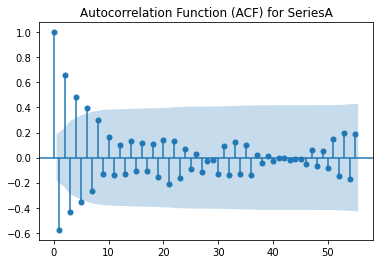

<Figure size 432x288 with 0 Axes>

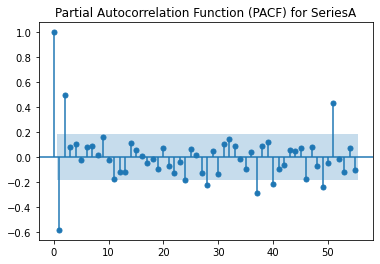

<Figure size 432x288 with 0 Axes>

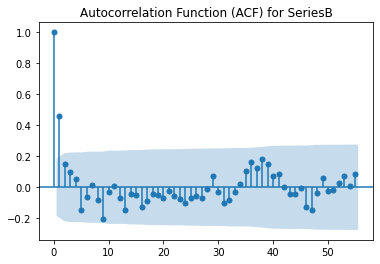

<Figure size 432x288 with 0 Axes>

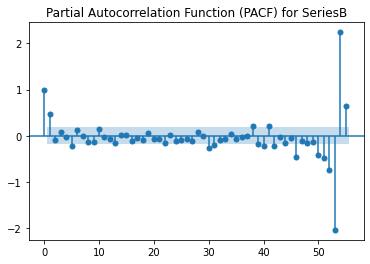

In [3]:
data = pd.read_csv('/Users/xiruixiang/Downloads/5291/TSData.csv')

# Perform linear regression of time for both SeriesA and SeriesB
time = np.arange(len(data))
slope_A, intercept_A, r_value_A, p_value_A, std_err_A = linregress(time, data['SeriesA'].dropna())
slope_B, intercept_B, r_value_B, p_value_B, std_err_B = linregress(time, data['SeriesB'].dropna())

# Calculate residuals for both SeriesA and SeriesB
residuals_A = data['SeriesA'].dropna() - (intercept_A + slope_A * time[:len(data['SeriesA'].dropna())])
residuals_B = data['SeriesB'].dropna() - (intercept_B + slope_B * time[:len(data['SeriesB'].dropna())])

# Find ACF and PACF for both SeriesA and SeriesB
acf_values_A = acf(residuals_A)
pacf_values_A = pacf(residuals_A)

acf_values_B = acf(residuals_B)
pacf_values_B = pacf(residuals_B)

# Plot ACF and PACF for both SeriesA and SeriesB
n_lags = min(len(residuals_A), len(residuals_B)) // 2 - 1

plt.figure()
plot_acf(residuals_A, lags=n_lags)
plt.title('Autocorrelation Function (ACF) for SeriesA')

plt.figure()
plot_pacf(residuals_A, lags=n_lags)
plt.title('Partial Autocorrelation Function (PACF) for SeriesA')

plt.figure()
plot_acf(residuals_B, lags=n_lags)
plt.title('Autocorrelation Function (ACF) for SeriesB')

plt.figure()
plot_pacf(residuals_B, lags=n_lags)
plt.title('Partial Autocorrelation Function (PACF) for SeriesB')

plt.show()


In [ ]:
#